In [1]:
import sys
from typing import Tuple


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from solution_1 import get_grid
from solution_1 import bfs_spiral_add_number_to_grid
from solution_1 import LIST_CYCLE_POSITION_SHIFT
from solution_1 import Grid
from solution_2 import bfs_spiral_add_number_to_grid_inpendent_of_grid


np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=sys.maxsize)

In [2]:
def display_solution(matrix, figsize=(10,10)):
    # Get the shape of the matrix
    num_rows, num_cols = matrix.shape

    # Create a meshgrid for X and Y
    np_array_x = np.arange(0, num_cols, 1)
    np_array_y = np.arange(0, num_rows, 1)
    np_array_2d_x, np_array_2d_y = np.meshgrid(np_array_x, np_array_y)

    # Create a 3D plot
    figure_1 = plt.figure(figsize=figsize)
    axes_1 = figure_1.add_subplot(111, projection='3d')

    # Add labels
    axes_1.set_xlabel('X-axis')
    axes_1.set_ylabel('Y-axis')
    axes_1.set_zlabel('Height')

    # Plot the 3D surface
    axes_1.plot_surface(np_array_2d_x, np_array_2d_y, matrix, cmap='viridis')
    
    ####################
    
    figure_2 = plt.figure(figsize=figsize)
    axes_2 = figure_2.add_subplot(111)
    
    image = axes_2.imshow(matrix, cmap='viridis', origin='lower')
    colorbar = figure_2.colorbar(image, ax=axes_2)  # Add colorbar to the subplot

    axes_2.set_title('Height Matrix')
    axes_2.set_xlabel('X-axis')
    axes_2.set_ylabel('Y-axis')
    
    ####################
    
    # Calculate the gradient using np.gradient
    gradient_y, gradient_x = np.gradient(matrix)

    # Create a vector field
    vector_field_x = -gradient_x
    vector_field_y = -gradient_y
    
    figure_3 = plt.figure(figsize=figsize)
    axes_3 = figure_3.add_subplot(111)

    axes_3.quiver(vector_field_x, vector_field_y, scale=20, scale_units='xy', angles='xy')
    axes_3.set_title('Vector Field (Gradient)')
    axes_3.set_xlabel('X-axis')
    axes_3.set_ylabel('Y-axis')

        

# Initial data

In [3]:
list_cycle_position_shift = LIST_CYCLE_POSITION_SHIFT

grid_size_x = 40
grid_size_y = 40

position_start: Tuple[int, int] = (20, 15)


# Solution 1

In [4]:
grid_1 = get_grid(grid_size_x, grid_size_y)

bfs_spiral_add_number_to_grid(
    grid_1, 
    position_start, 
    list_cycle_position_shift
)
    
matrix_1 = np.array(grid_1)
matrix_1

array([[ 806,  725,  648,  575,  506,  421,  422,  423,  424,  425,  426,  427,  428,  429,  430,  431,  432,  433,  434,  435,  436,  437,  438,  439,  440,  441,  442,  507,  576,  649,  726,  807,  865,  925,  987, 1051, 1117, 1185, 1255, 1327],
       [ 805,  724,  647,  574,  505,  420,  343,  344,  345,  346,  347,  348,  349,  350,  351,  352,  353,  354,  355,  356,  357,  358,  359,  360,  361,  362,  443,  508,  577,  650,  727,  808,  866,  926,  988, 1052, 1118, 1186, 1256, 1328],
       [ 804,  723,  646,  573,  504,  419,  342,  273,  274,  275,  276,  277,  278,  279,  280,  281,  282,  283,  284,  285,  286,  287,  288,  289,  290,  363,  444,  509,  578,  651,  728,  809,  867,  927,  989, 1053, 1119, 1187, 1257, 1329],
       [ 803,  722,  645,  572,  503,  418,  341,  272,  211,  212,  213,  214,  215,  216,  217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  291,  364,  445,  510,  579,  652,  729,  810,  868,  928,  990, 1054, 1120, 1188, 1258, 1330],
    

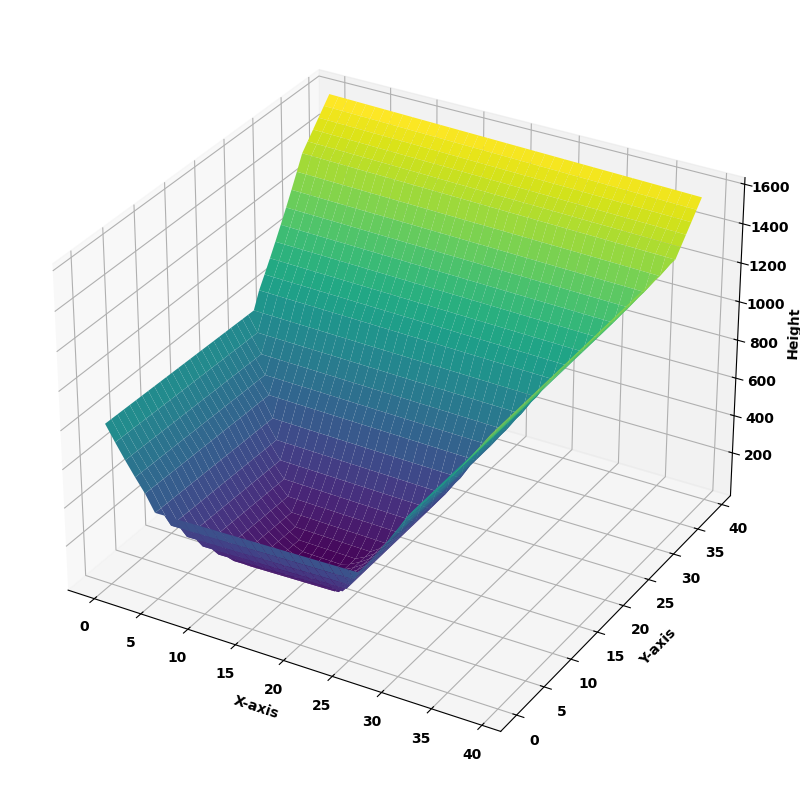

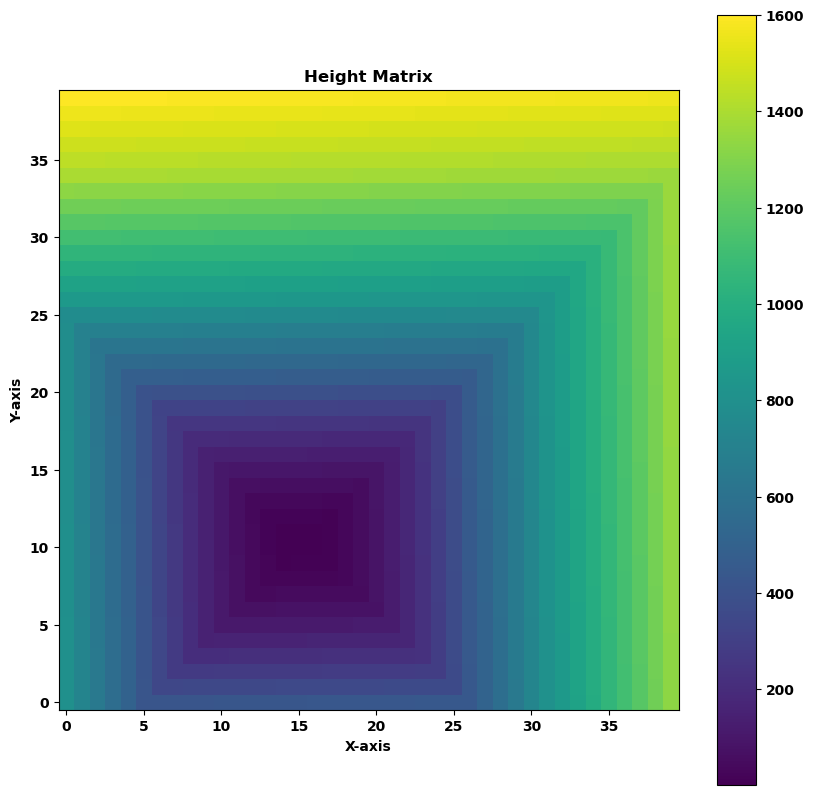

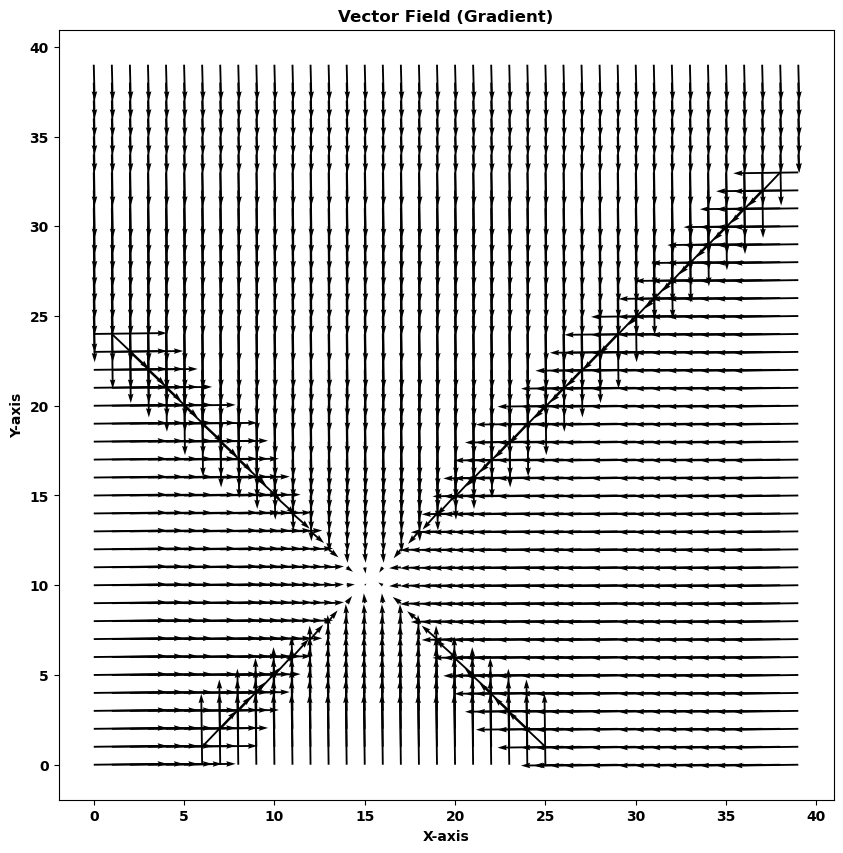

In [5]:
display_solution(matrix_1)

# Solution 2

In [6]:
grid_2 = get_grid(grid_size_x, grid_size_y)

number_of_valid_positions_on_grid = grid_size_x * grid_size_y

bfs_spiral_add_number_to_grid_inpendent_of_grid(
    grid_2, 
    number_of_valid_positions_on_grid, 
    position_start, 
    list_cycle_position_shift
)

matrix_2 = np.array(grid_2)
matrix_2

array([[ 926,  809,  700,  599,  506,  421,  422,  423,  424,  425,  426,  427,  428,  429,  430,  431,  432,  433,  434,  435,  436,  437,  438,  439,  440,  441,  442,  531,  628,  733,  846,  967, 1096, 1233, 1378, 1531, 1692, 1861, 2038, 2223],
       [ 925,  808,  699,  598,  505,  420,  343,  344,  345,  346,  347,  348,  349,  350,  351,  352,  353,  354,  355,  356,  357,  358,  359,  360,  361,  362,  443,  532,  629,  734,  847,  968, 1097, 1234, 1379, 1532, 1693, 1862, 2039, 2224],
       [ 924,  807,  698,  597,  504,  419,  342,  273,  274,  275,  276,  277,  278,  279,  280,  281,  282,  283,  284,  285,  286,  287,  288,  289,  290,  363,  444,  533,  630,  735,  848,  969, 1098, 1235, 1380, 1533, 1694, 1863, 2040, 2225],
       [ 923,  806,  697,  596,  503,  418,  341,  272,  211,  212,  213,  214,  215,  216,  217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  291,  364,  445,  534,  631,  736,  849,  970, 1099, 1236, 1381, 1534, 1695, 1864, 2041, 2226],
    

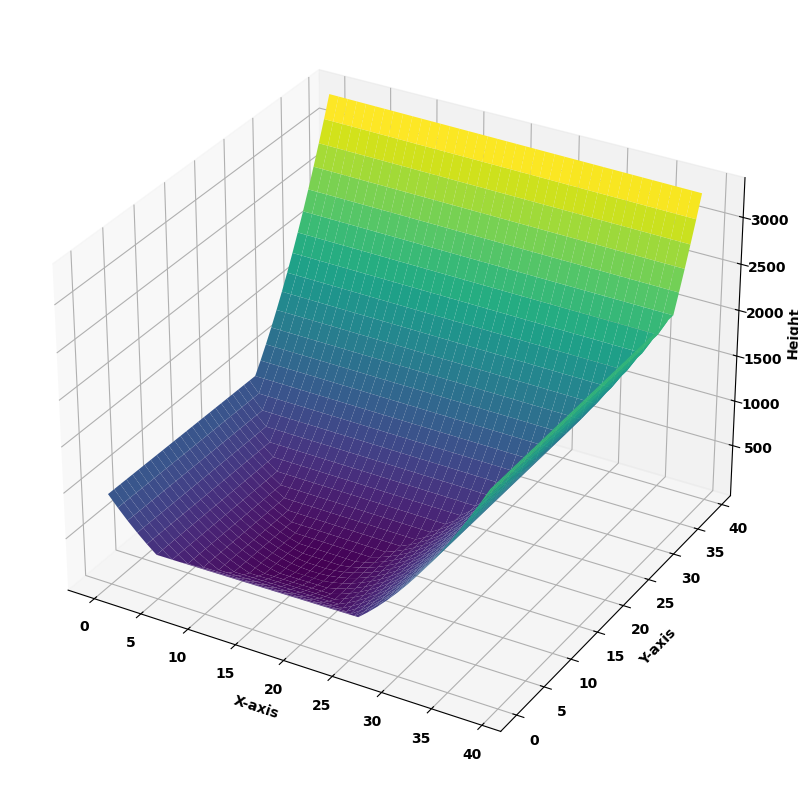

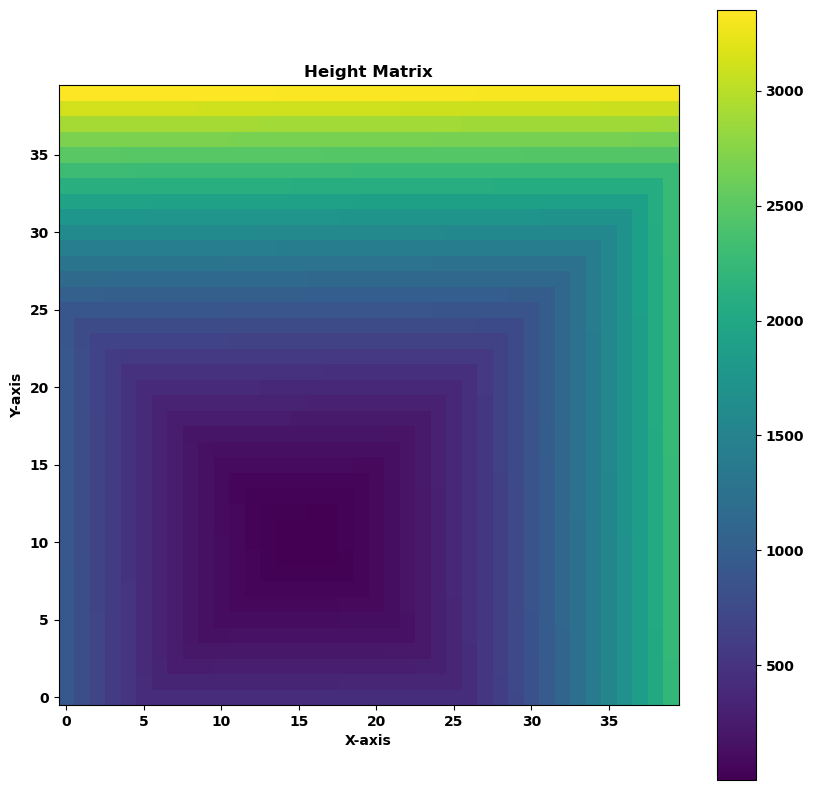

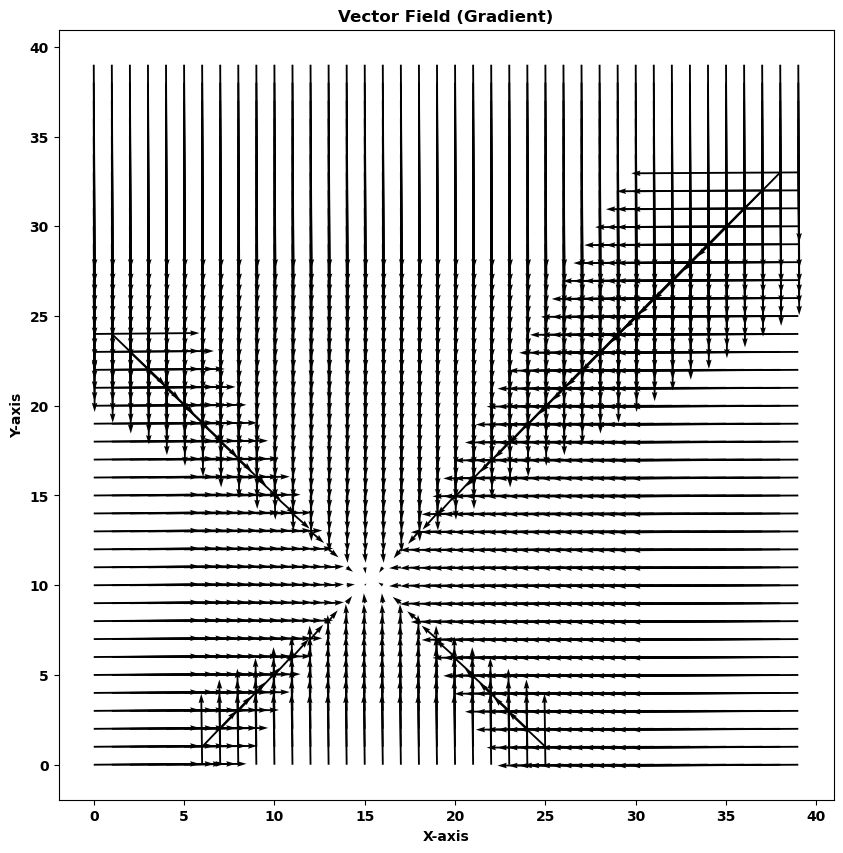

In [7]:
display_solution(matrix_2)

# Testing fun modifications

In [8]:
list_cycle_position_shift_custom = [
    (0, -1),  # Up
    (0, 1),  # Down
    (1, 0),  # Right
    (-1, 0),  # Left
    (1, -1),  # Up Right
    (-1, 1),  # Down Left
    (-1, -1),  # Up Left
    (1, 1),  # Down Right
]


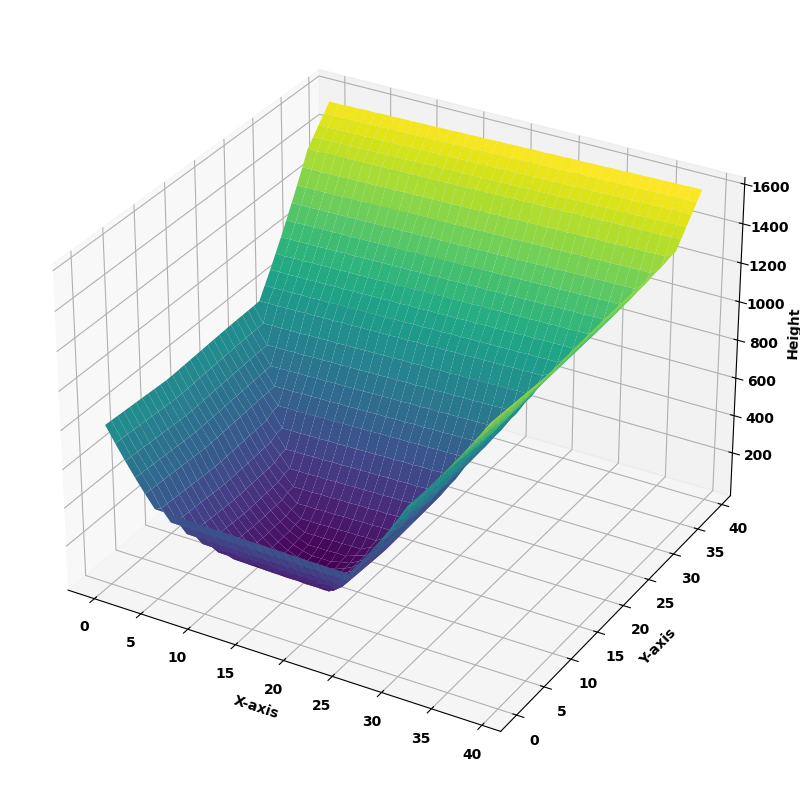

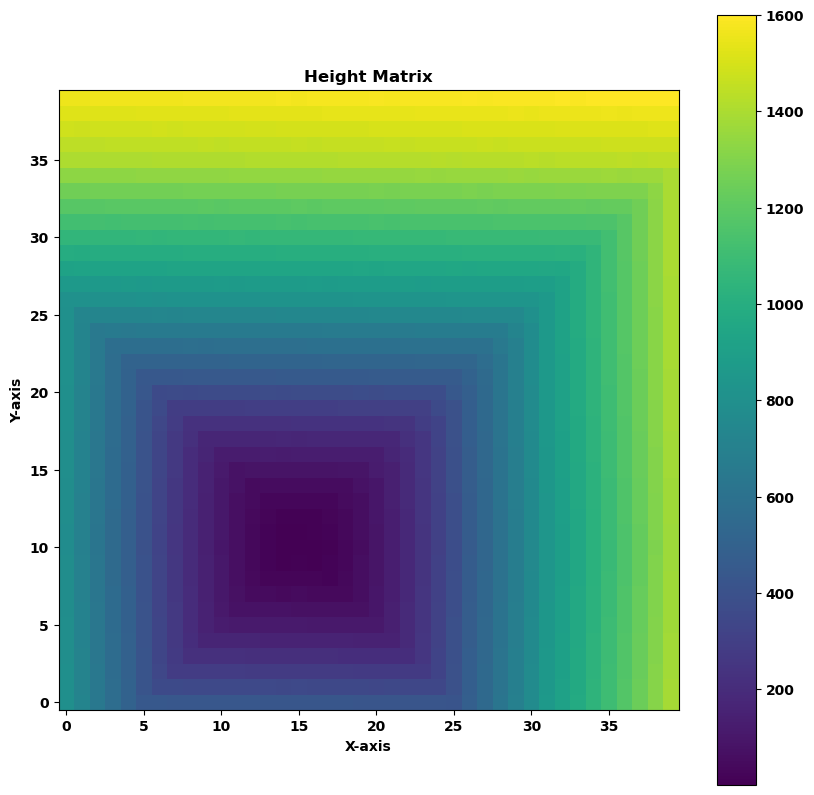

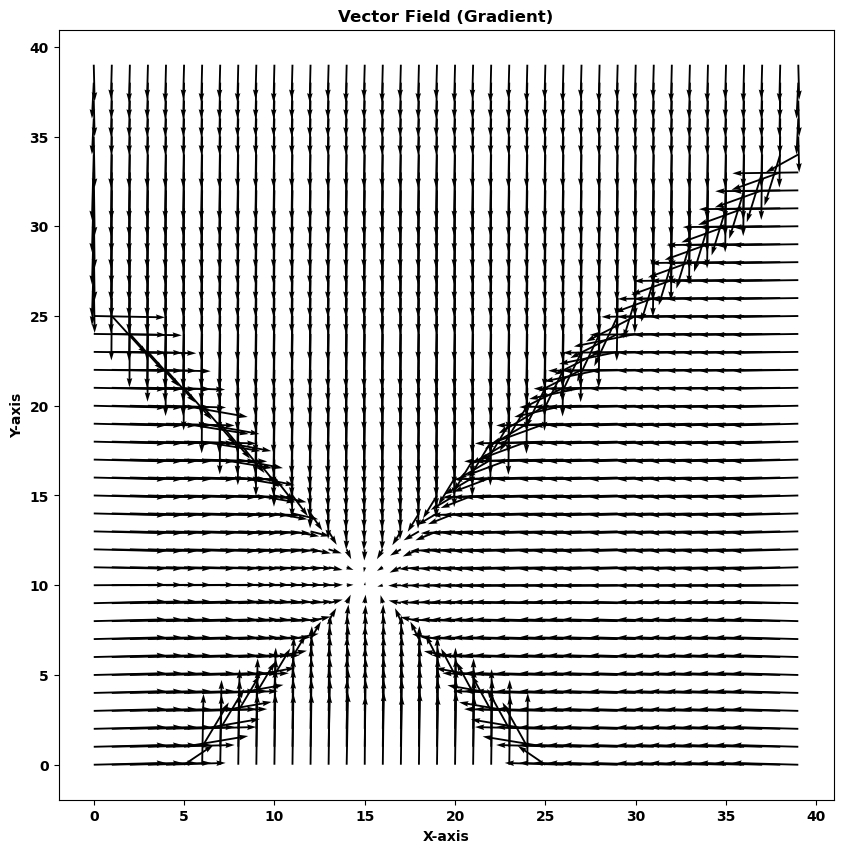

In [9]:
grid_3 = get_grid(grid_size_x, grid_size_y)

bfs_spiral_add_number_to_grid(
    grid_3, 
    position_start, 
    list_cycle_position_shift_custom
)

matrix_3 = np.array(grid_3)
display_solution((matrix_3))

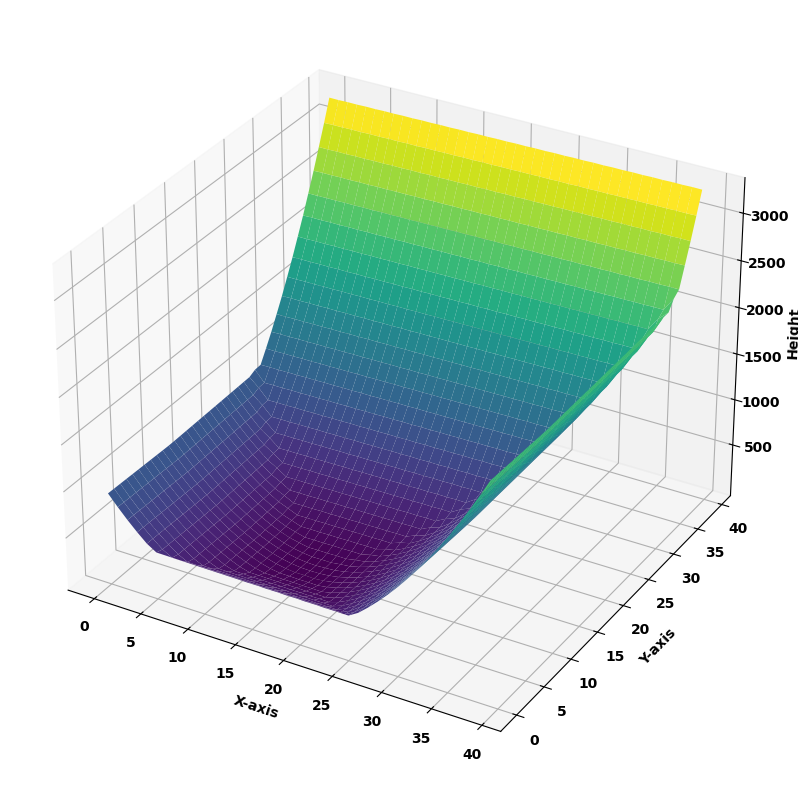

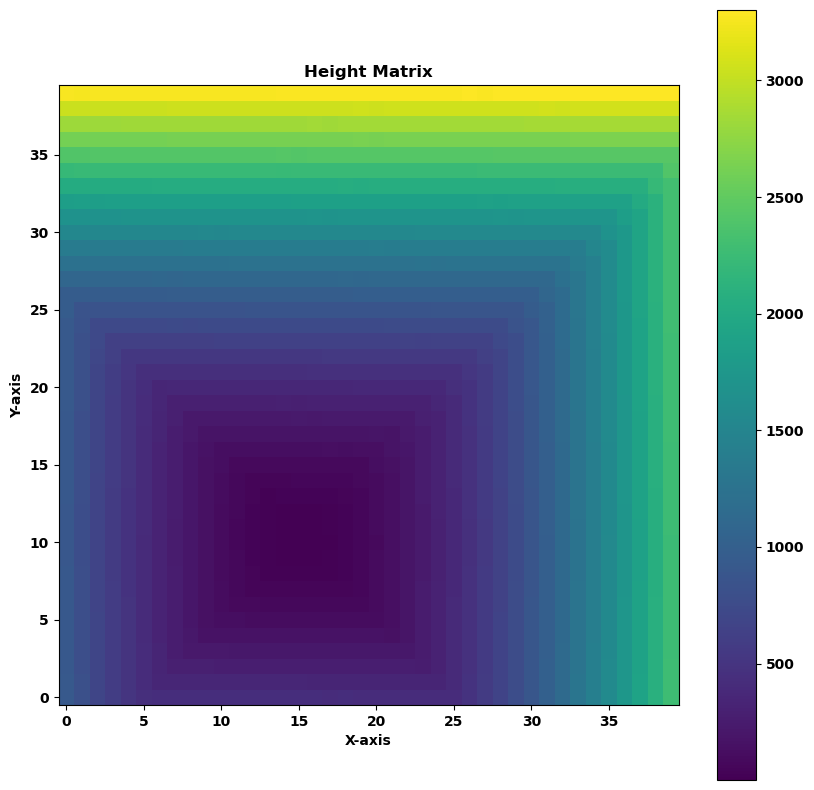

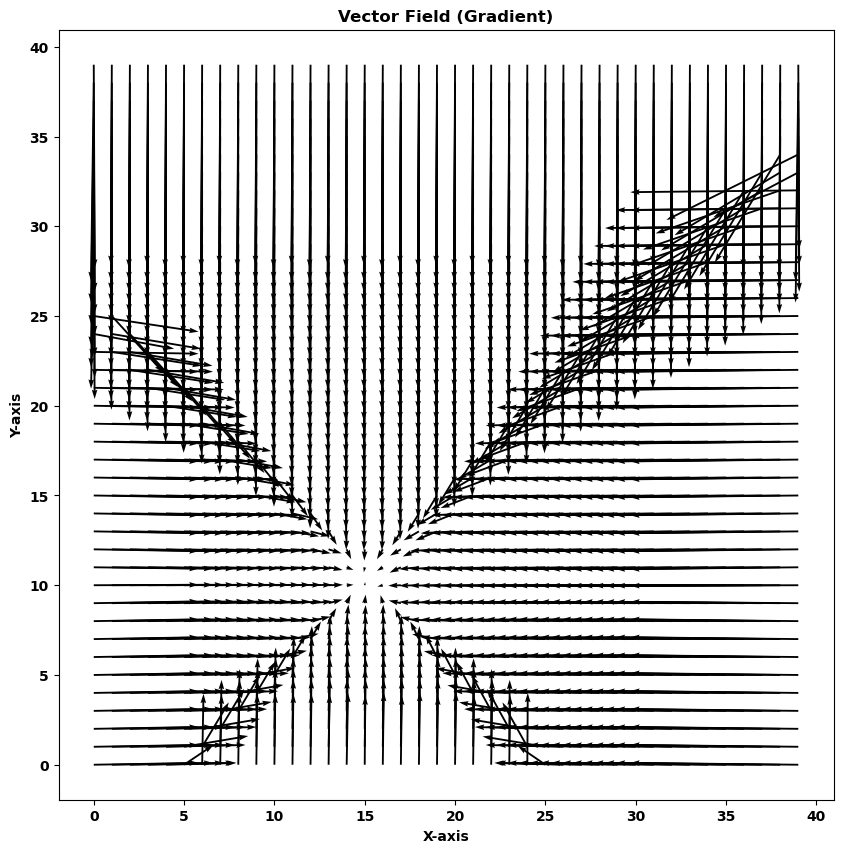

In [10]:
grid_4 = get_grid(grid_size_x, grid_size_y)

number_of_valid_positions_on_grid = grid_size_x * grid_size_y

bfs_spiral_add_number_to_grid_inpendent_of_grid(
    grid_4, 
    number_of_valid_positions_on_grid, 
    position_start, 
    list_cycle_position_shift_custom
)

matrix_4 = np.array(grid_4)
display_solution((matrix_4))
